<a href="https://colab.research.google.com/github/Shrutakeerti/Weather-Forecasting-system/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
data=pd.read_csv("/content/seattle-weather.csv")

In [18]:
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
data.shape


(1461, 6)

<Axes: ylabel='count'>

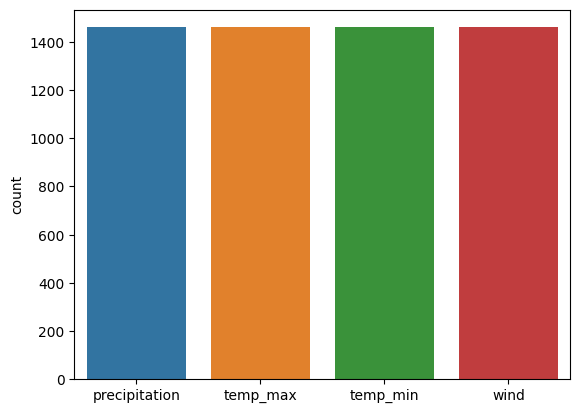

In [19]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data)


In [20]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countfog=len(data[data.weather=='fog'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
print('percent of rain:{:2f}%'.format((countrain/len(data.weather))*100))
print('percent of sun:{:2f}%'.format((countsun/len(data.weather))*100))
print('percent of fog:{:2f}%'.format((countfog/len(data.weather))*100))
print('percent of drizzle:{:2f}%'.format((countdrizzle/len(data.weather))*100))
print('percent of snow:{:2f}%'.format((countsnow/len(data.weather))*100))


percent of rain:43.874059%
percent of sun:43.805613%
percent of fog:6.913073%
percent of drizzle:3.627652%
percent of snow:1.779603%


In [21]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

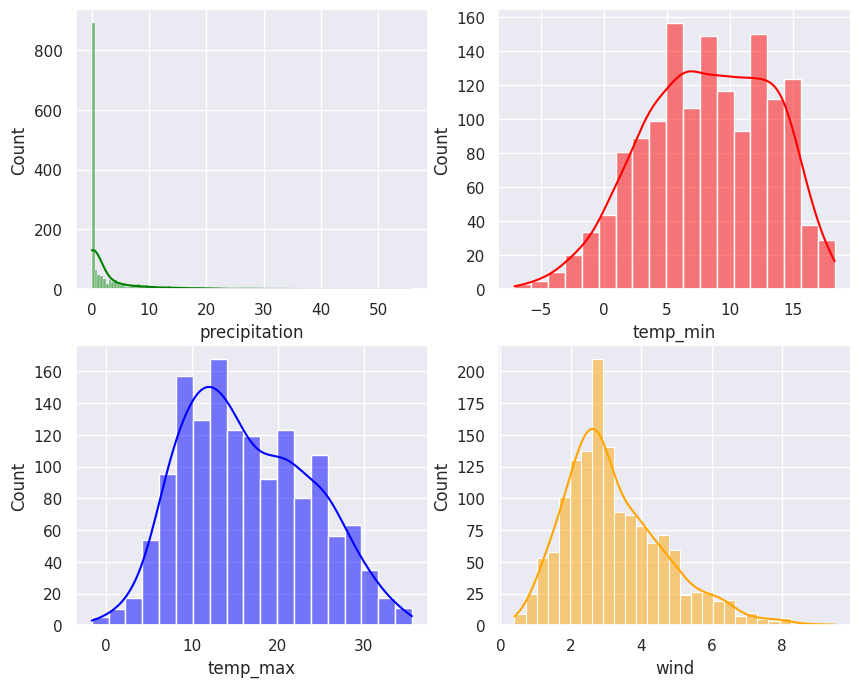

In [22]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')


<Axes: xlabel='wind'>

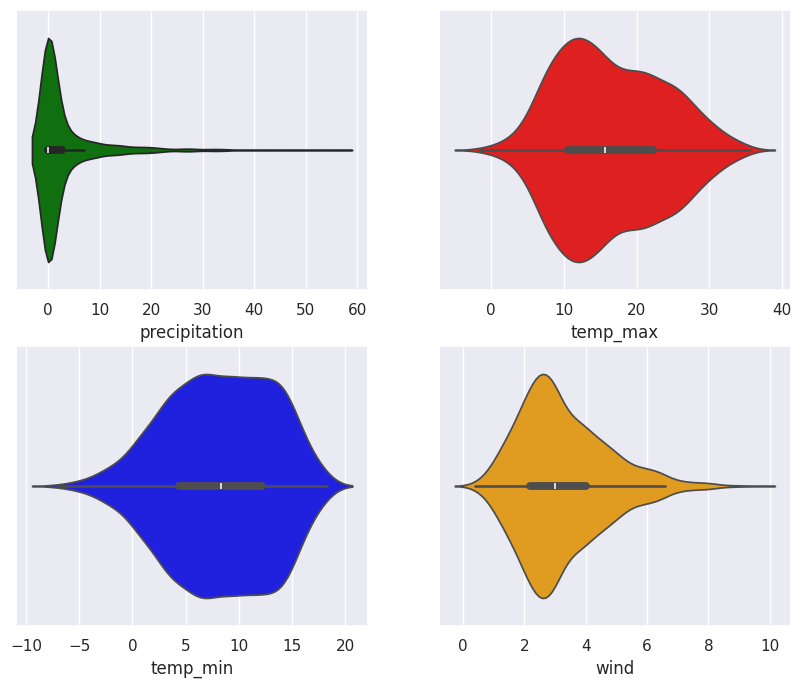

In [23]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',ax=axs[1,0],color='blue')
sns.violinplot(data=data,x='wind',ax=axs[1,1],color='orange')

<Axes: >

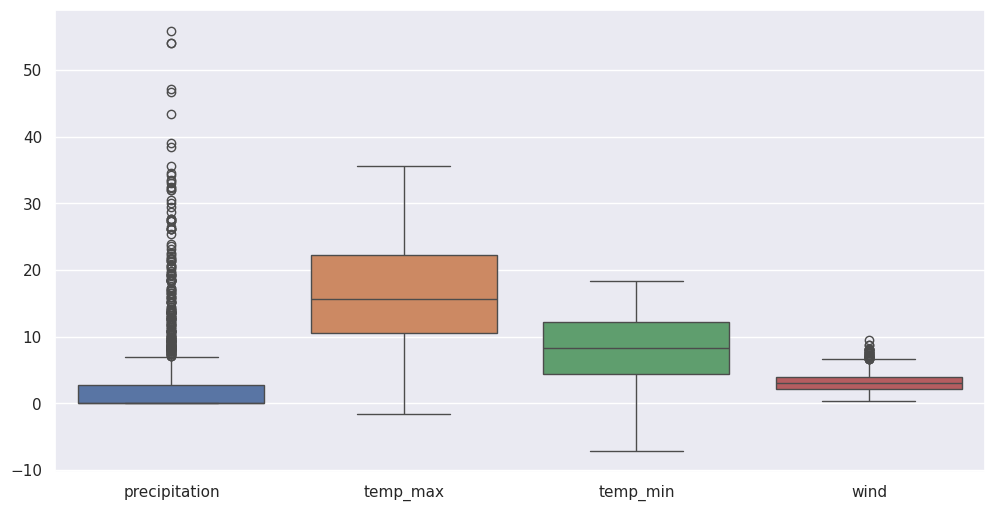

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data)

<Axes: >

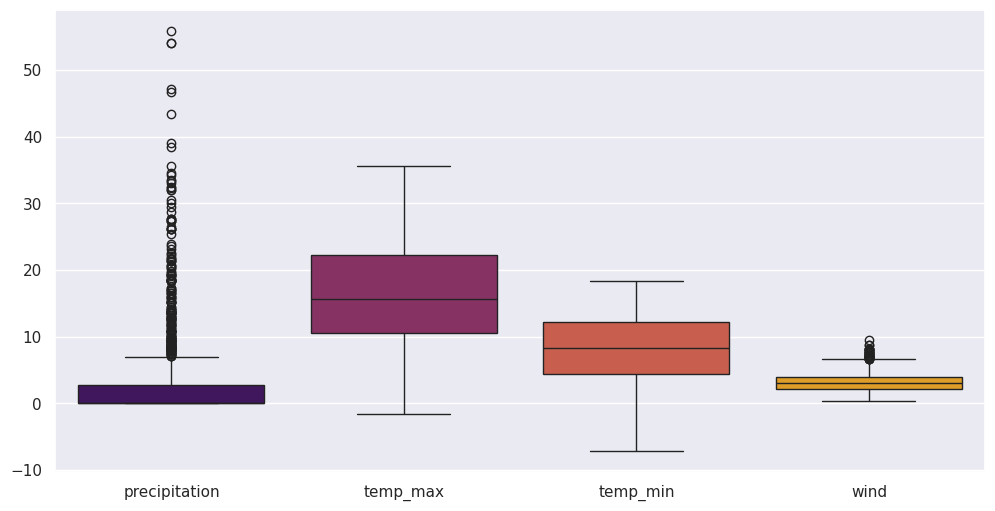

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data,palette='inferno')

<Axes: ylabel='weather'>

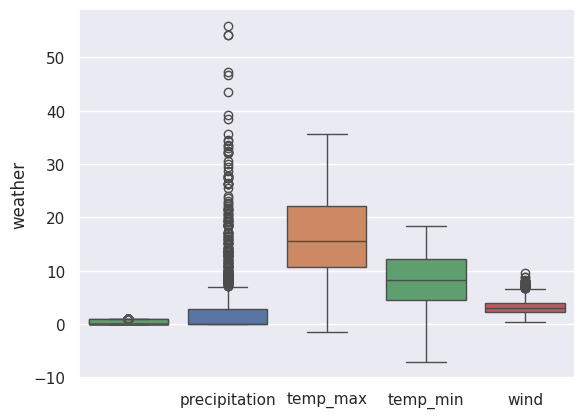

In [26]:
sns.boxplot(data.weather=='rain')
sns.boxplot(data.weather=='snow')
sns.boxplot(data.weather=='sun')
sns.boxplot(data.weather=='drizzle')
sns.boxplot(data.weather=='fog')
sns.boxplot(data)


<Axes: >

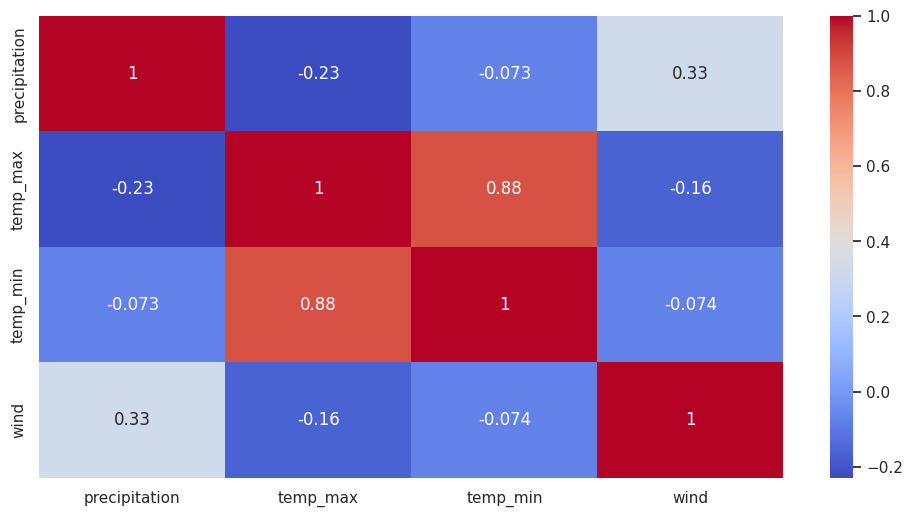

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

pearsons correlation: -0.22855481643297046
T test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


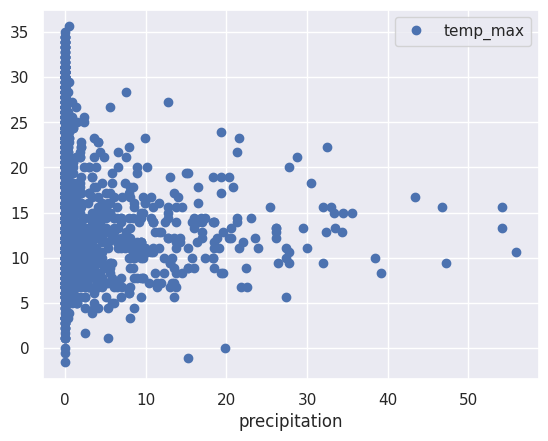

In [28]:
data.plot("precipitation","temp_max",style='o')
print('pearsons correlation:',data['precipitation'].corr(data['temp_max']))
print('T test and P value:',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation: -0.16485663487495486
T test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


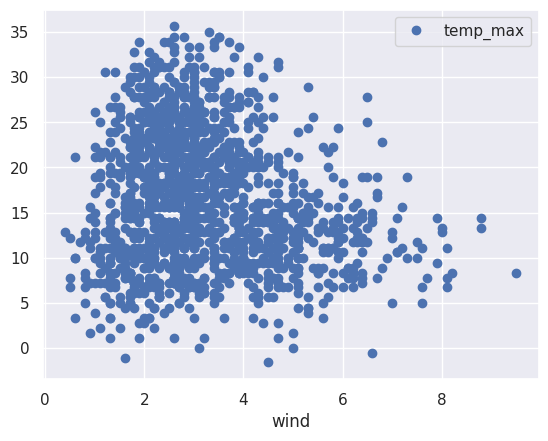

In [29]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation:',data['wind'].corr(data['temp_max']))
print('T test and P value:',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

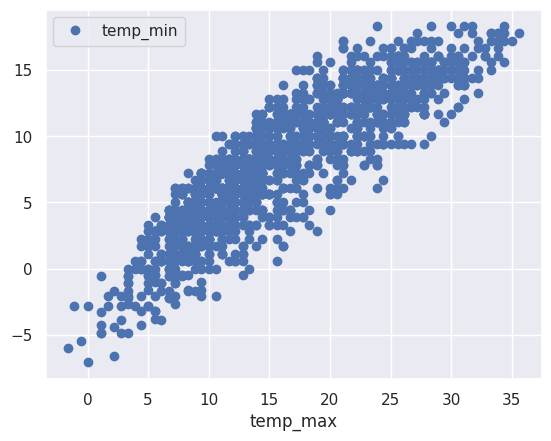

In [31]:
data.plot('temp_max','temp_min',style='o')

In [32]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

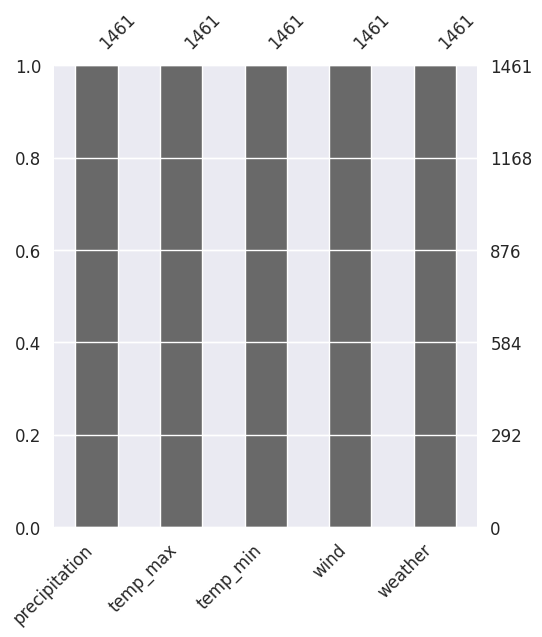

In [42]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data,ax=axz,fontsize=12)

In [39]:
data=data.drop(['date'],axis=1)

In [43]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [44]:
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

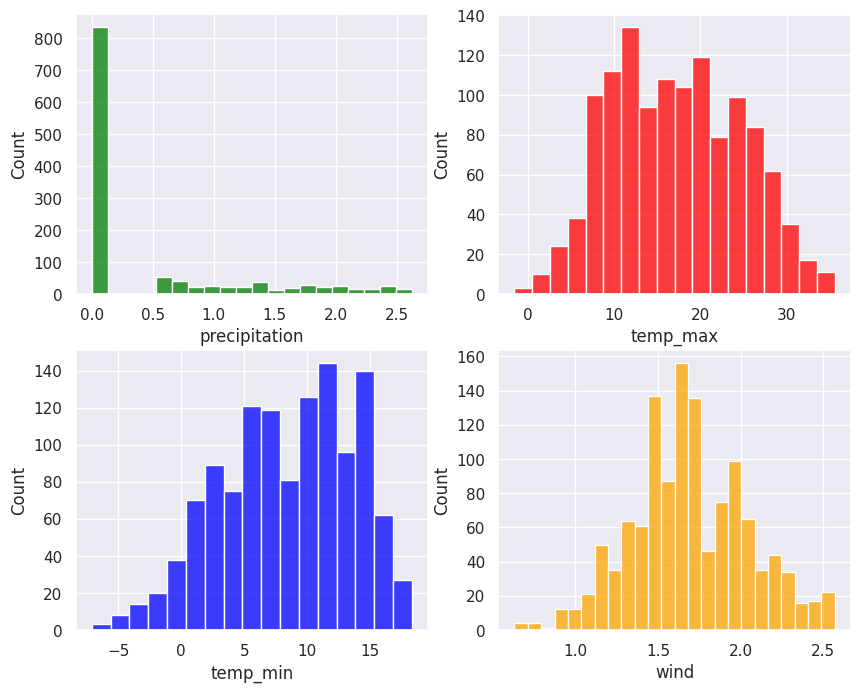

In [45]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',ax=axs[1,1],color='orange')

In [46]:
data.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [47]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])


In [48]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [53]:
x=(data.loc)
y=data['weather'].values

In [54]:
data.weather.unique()


array([0, 2, 4, 3, 1])

In [66]:
<class 'pandas.core.indexing._LocIndexer'>
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

SyntaxError: invalid syntax (<ipython-input-66-253191ae181f>, line 1)

In [64]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{%2f}%'.format(knn.score(x_test,y_test)*100))

NameError: name 'x_train' is not defined